# Finding Roots and Solving (Non)linear ODEs

Our goal is to solve

$$
\frac{d\mathbf{y}}{dt} = \mathbf{F}(t, \mathbf{y}(t))
$$

subject to appropropriate initial conditions.

## Numerical ODEs: a Review

Consider good old $y'(t) = -a y(t)$ subject to $y(0) = y_0$.

Solution: $y(t)=y_0 e^{-at}$.

Solve numerically by noting

$$
y(t + \Delta) = y(t) + \Delta y'(t) + \frac{\Delta}{2} y''(t) + \ldots \, ,
$$

and, thus, 

$$
\frac{dy}{dt} \approx \frac{y(t+\Delta)-y(t)}{\Delta} \, .
$$

Substitute the finite difference into the ODE to get

$$
   \frac{y(t + \Delta)}{\Delta} = -a y(t)  \quad \big ( = F(t, y(t)) \big)
$$

or 

$$
   \frac{y(t + \Delta)}{\Delta} = -a y(t+\Delta) \quad \big ( = F(t+\Delta, y(t+\Delta) \big ) \, .
$$

The first approach is **forward Euler** and is explicit ($y(t+\Delta)$ depends explicitly on information from time $t$).  The second approach is **backward Euler** and is implicit (($y(t+\Delta)$ depends implicitly on itself since the right-hand side is evaluated at time $t+\Delta$).  Both methods are **first-order** methods (errors proportional to $\Delta$).  However, whereas backward Euler is **unconditionally stable**, forward Euler is stable only for sufficiently small time step $\Delta$.



**Quick Exercise**:  Use FE and BE to solve $y' = ay$ with $y(0)=1$ for different $a$ (+ and -) and $\Delta t$ values.  Can you determine when FE leads to suspect behavior (e.g., negative values, oscillations, and other things not consistent with $y(t) = e^{at}$?

**Quick Exercise**: Solve $y' = 1 - y(t)$ with $y(0)=0$ with BE.  Plot the absolute difference between your answer at $t=10$ and the analytic solution as a function of $\Delta$.

## Nonlinear Equations

Consider the following model for transient, convective cooling of a lumped system (i.e., no spatial dependence):

$$
\rho V C_p (T) \frac{dT}{dt} + h A(T-T_{\infty}) \, = 0,
$$

with $T(0) = T_0$.  Here, $\rho$ is density, $V$ is the body volume, $C_p(T) = a T + b$ is heat capacity, $h$ is the heat transfer coefficient, $A$ is the body surface area, and $T_{\infty}$ is the ambient temperature (equal to the temperature of the body at $t = \infty$. Note, this model is nonlinear because a coefficient ($C_p(T)$) depends on the solution $T$.



Let's apply BE to the model:
$$
  T(t + \Delta) = \frac{-hA[T(t+\Delta)-T_{\infty}]\Delta}{\rho V C_p(T(t+\Delta))} + T(t) \, .
$$
Given $t$, $T(t)$, $\Delta$, and all the system coefficients, we're stuck with the **nonlinear** equation
$$
  f(x) = x - T(t) + \frac{-hA[x-T_{\infty}]\Delta}{\rho V C_p(x)} + T(t) = 0 \, .
$$
where $x = T(t+\Delta)$.

To solve $f(x) = 0$ is to find the roots (zeros) of $f(x)$.  Common schemes:
- **bisection**: If you know that just one root is in $[x_L, x_R]$, check $x_L$, $x_R$, and the point $x_C=(x_L+x_R)/2$.  Unless $f(x_C)$ is zero, the sign of $f(x_C)$ must be the same as $f(x_L)$ or $f(x_R)$.  Cut the search region in half by setting $x_L = x_C$ if $sign(f(x_C)) = sign(f(x_L))$ or by setting $x_R = x_C$. 
- **Newton's method**:  Guess $x_0$ for the root. If you know the derivative of $f(x)$, evaluate $f'(x_0)$ and follow that tangent line to the $x$ axis for an updated guess $x_1$.
- **Secant method**  Guess $x_0$ for the root. Approximate $f'(x_0)$ with $(f(x_0+\Delta)-f(x))/\Delta$ and follow that tangent line to the $x$ axis for an updated guess $x_1$.

While you should be able to implement each of these for arbitrary, univariate $f(x)$, SciPy has robust options.  Let's try two examples:

1. $f(x) = a\sin(bx)$ for $a = 2$ and $b = 3$.
2. The set of equation $x^3 + y = 1$ and $x - y^3 = 1$.  

In [2]:
from scipy.optimize import fsolve
import scipy as sp

# example one
def func(x, a, b):
    return a*sp.sin(b*x)
sol1 = fsolve(func, x0=1.0, args=(2, 3))
sol2 = fsolve(func, x0=0.0, args=(2, 3))
print(sol1, sol2)

[ 1.04719755] [ 0.]


In [3]:
2*sp.sin(3*1.04719755) # close!

7.1795869478616433e-09

In [36]:
# example 2
def func2(z):
    x, y = z # unpack the unknowns
    return x**3 + y - 1, x - y**3 - 1
sol3 = fsolve(func2, x0=[1, 1])
print(sol3)
print(func2(sol3))

[  1.00000000e+00   1.19299863e-12]
(5.4996007747831754e-12, 1.4355183708403274e-12)


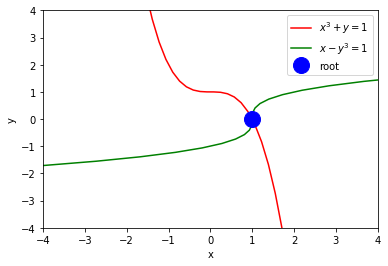

In [37]:
x = sp.linspace(-4, 4)
y = sp.linspace(-4, 4)
import matplotlib.pyplot as plt
plt.plot(x, 1-x**3, 'r', y**3+1, y, 'g')
plt.plot(sol3[0], sol3[1], 'bo', ms=16)
plt.axis([-4, 4, -4, 4])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['$x^3 + y = 1$', '$x-y^3=1$', 'root'])
plt.show()

## Back to ODEs: `odeint`

A warm-up: `odeint` for `y' = -ay` for `y(0)=1` and $a=2$.  

Note, `odeint` solves systems of first-order equations in the form $\mathbf{y}' = \mathbf{f}(t, \mathbf{y})$.  Hence, one needs the right-hand side function.  One also needs the times at which the solution is to be evaluated.

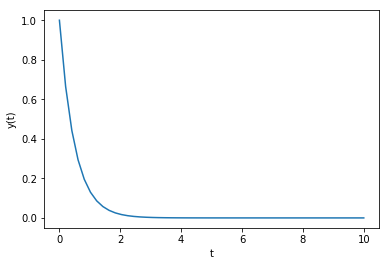

In [58]:
from scipy.integrate import odeint
def rhs(y, t, a):
    return -a*y[0]
times = sp.linspace(0, 10)
sol = odeint(rhs, [1], times, args=(2,)) # notice that (2,) is needed to make it appears as a tuple.
sol = sol.reshape((len(times))) # returns an array of array (one array per time step with each unknown)
plt.plot(times, sol)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

A bit more work:  Solve

$$
y' = -ay 
z' = -bz + ay
$$
with $y(0) = 1$, $z(0)=0$, and $a=b=1$.

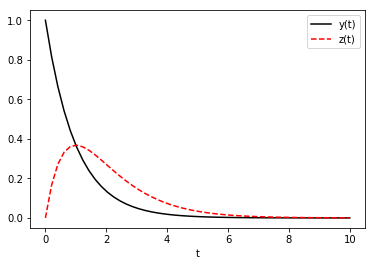

In [68]:
def rhs(u, t, a, b): # using u.  remember, function argument names are arbitrary
    y, z = u # unpack
    dydt = -a*y
    dzdt = -b*z + a*y
    return dydt, dzdt
times = sp.linspace(0, 10)
sol = odeint(rhs, [1, 0], times, args=(1, 1)) # notice that (2,) is needed to make it appears as a tuple.
sol = sol.T
plt.plot(times, sol[0], 'k-', label='y(t)')
plt.plot(times, sol[1], 'r--', label='z(t)')
plt.xlabel('t')
plt.legend()
plt.show()